In [2]:
import re
import math 
import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly 
import plotly.graph_objects as go 
import plotly.offline as pyo 
from plotly.offline import init_notebook_mode 
import plotly.express as px

In [11]:
df = pd.read_csv(r'C:\Users\Admin\GA\DSI15-lessons\project\project-capstone\part-02\Demand_clean',parse_dates=['timestamp'])

In [12]:
df.set_index('timestamp',inplace=True)

In [13]:
df.index

DatetimeIndex(['2011-05-27 15:50:04', '2011-05-27 15:55:02',
               '2011-05-27 16:00:02', '2011-05-27 16:05:01',
               '2011-05-27 16:10:02', '2011-05-27 16:15:01',
               '2011-05-27 16:20:02', '2011-05-27 16:25:04',
               '2011-05-27 16:30:03', '2011-05-27 16:35:01',
               ...
               '2021-02-13 12:50:40', '2021-02-13 12:55:39',
               '2021-02-13 13:00:42', '2021-02-13 13:05:40',
               '2021-02-13 13:10:43', '2021-02-13 13:15:41',
               '2021-02-13 13:20:46', '2021-02-13 13:25:41',
               '2021-02-13 13:30:44', '2021-02-13 13:35:41'],
              dtype='datetime64[ns]', name='timestamp', length=1020142, freq=None)

In [15]:
df_copy = df.copy()
# drop irrelevant columns 
df_copy.drop(columns=['frequency'],inplace=True)

In [16]:
# Create new dataframes with resampled time steps 
#df_weekly = df_copy.resample('w').mean()
#df_daily = df_copy.resample('d').mean()
df_hourly = df_copy.resample('h').mean()

<AxesSubplot:xlabel='timestamp'>

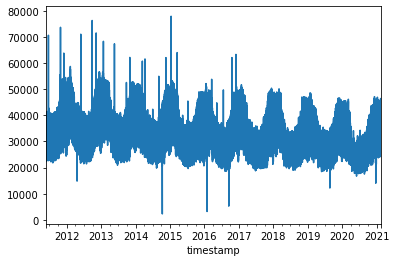

In [8]:
df_hourly.demand.plot()

In [9]:
#Assessing the peaks
df_hourly.demand[df_hourly.demand > 60000]

timestamp
2011-06-21 11:00:00    70619.083333
2011-10-27 11:00:00    73662.666667
2011-12-01 12:00:00    63786.666667
2012-05-29 12:00:00    71025.333333
2012-09-27 11:00:00    76275.916667
2012-11-08 12:00:00    71500.750000
2013-01-24 12:00:00    68307.583333
2013-05-21 12:00:00    67349.166667
2013-10-31 12:00:00    62139.833333
2014-03-13 11:00:00    60738.500000
2014-04-10 11:00:00    61554.166667
2014-11-18 12:00:00    62072.083333
2015-01-12 09:00:00    77896.750000
2015-01-12 10:00:00    71680.666667
2015-03-17 13:00:00    63989.416667
2016-10-18 12:00:00    62081.083333
2016-11-29 12:00:00    63293.666667
Name: demand, dtype: float64

In [10]:
#Assesing the severe drops in demand
df_hourly.demand[df_hourly.demand < 15000]

timestamp
2012-04-20 10:00:00    14809.083333
2014-10-11 02:00:00     7867.384615
2014-10-11 03:00:00     2248.916667
2014-10-11 04:00:00     2248.916667
2016-01-28 23:00:00     3171.333333
2016-09-14 14:00:00     5233.000000
2019-08-22 15:00:00    12154.250000
2020-12-21 06:00:00    13998.833333
Name: demand, dtype: float64

In [11]:
#Assess missing values
df_hourly[df_hourly.demand.isna() == True ].head()

demand  coal  nuclear  ccgt  wind  pumped  hydro  \
timestamp                                                               
2011-08-09 06:00:00     NaN   NaN      NaN   NaN   NaN     NaN    NaN   
2011-08-09 07:00:00     NaN   NaN      NaN   NaN   NaN     NaN    NaN   
2011-08-09 08:00:00     NaN   NaN      NaN   NaN   NaN     NaN    NaN   
2011-11-12 08:00:00     NaN   NaN      NaN   NaN   NaN     NaN    NaN   
2012-11-28 19:00:00     NaN   NaN      NaN   NaN   NaN     NaN    NaN   

                     biomass  oil  solar  ...  nemo  other  north_south  \
timestamp                                 ...                             
2011-08-09 06:00:00      NaN  NaN    NaN  ...   NaN    NaN          NaN   
2011-08-09 07:00:00      NaN  NaN    NaN  ...   NaN    NaN          NaN   
2011-08-09 08:00:00      NaN  NaN    NaN  ...   NaN    NaN          NaN   
2011-11-12 08:00:00      NaN  NaN    NaN  ...   NaN    NaN          NaN   
2012-11-28 19:00:00      NaN  NaN    NaN  ...   NaN    NaN          NaN   

                     scotland_england  ifa2  Non_Domestic_Demand_Flow  \
timestamp                                                               
2011-08-09 06:00:00               NaN   NaN                       NaN   
2011-08-09 07:00:00               NaN   NaN                       NaN   
2011-08-09 08:00:00               NaN   NaN                       NaN   
2011-11-12 08:00:00               NaN   NaN                       NaN   
2012-11-28 19:00:00               NaN   NaN                       NaN   

                     Total_domestic_supply  day  Month  Year  
timestamp                                                     
2011-08-09 06:00:00                    NaN  NaN    NaN   NaN  
2011-08-09 07:00:00                    NaN  NaN    NaN   NaN  
2011-08-09 08:00:00                    NaN  NaN    NaN   NaN  
2011-11-12 08:00:00                    NaN  NaN    NaN   NaN  
2012-11-28 19:00:00                    NaN  NaN    NaN   NaN  

[5 rows x 25 columns]

In [17]:
#Forward fill 
df_hourly.demand.fillna(method='ffill',inplace=True)

In [18]:
df_hourly['Week_day'] = df_hourly.index.map(lambda x: x.strftime('%A'))

In [19]:
df_hourly['hour_of_day'] = df_hourly.index.map(lambda x: x.hour)

In [20]:
df_hourly.Week_day

timestamp
2011-05-27 15:00:00      Friday
2011-05-27 16:00:00      Friday
2011-05-27 17:00:00      Friday
2011-05-27 18:00:00      Friday
2011-05-27 19:00:00      Friday
                         ...   
2021-02-13 09:00:00    Saturday
2021-02-13 10:00:00    Saturday
2021-02-13 11:00:00    Saturday
2021-02-13 12:00:00    Saturday
2021-02-13 13:00:00    Saturday
Freq: H, Name: Week_day, Length: 85199, dtype: object

In [21]:
df_hourly.hour_of_day

timestamp
2011-05-27 15:00:00    15
2011-05-27 16:00:00    16
2011-05-27 17:00:00    17
2011-05-27 18:00:00    18
2011-05-27 19:00:00    19
                       ..
2021-02-13 09:00:00     9
2021-02-13 10:00:00    10
2021-02-13 11:00:00    11
2021-02-13 12:00:00    12
2021-02-13 13:00:00    13
Freq: H, Name: hour_of_day, Length: 85199, dtype: int64

In [22]:
df_hourly.shape

(85199, 27)

In [24]:
weekday_hour = df_hourly.groupby(['Week_day','hour_of_day']).mean().demand

In [25]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for day in weekdays:
    if day == 'Monday':
        fig = go.Figure(data=go.Scatter(y=weekday_hour[day],name=day))
    else:
        fig.add_trace(go.Scatter(y=weekday_hour[day],name=day))
    
    fig.update_layout(title="Average Hourly Demands per Day",
                     yaxis_title="Demand",
                     xaxis_title="Hour of the Day")
       
fig.show()
#     weekday_hour[day].plot()
#     plt.grid()
#     plt.show()


In [26]:
#Creating the new hourly datafram with only predictors i will use 
df_hourly1 = df_hourly.copy()
df_hourly1.drop(columns=['coal', 'nuclear', 'ccgt', 'wind', 'pumped', 'hydro',
       'biomass', 'oil', 'solar', 'ocgt', 'french_ict', 'dutch_ict',
       'irish_ict', 'ew_ict', 'nemo', 'other', 'north_south',
       'scotland_england', 'ifa2','Total_domestic_supply','Non_Domestic_Demand_Flow'],inplace=True)

In [27]:
df_hourly1.columns

Index(['demand', 'day', 'Month', 'Year', 'Week_day', 'hour_of_day'], dtype='object')

In [28]:
df_hourly1.day

timestamp
2011-05-27 15:00:00    27.0
2011-05-27 16:00:00    27.0
2011-05-27 17:00:00    27.0
2011-05-27 18:00:00    27.0
2011-05-27 19:00:00    27.0
                       ... 
2021-02-13 09:00:00    13.0
2021-02-13 10:00:00    13.0
2021-02-13 11:00:00    13.0
2021-02-13 12:00:00    13.0
2021-02-13 13:00:00    13.0
Freq: H, Name: day, Length: 85199, dtype: float64

In [29]:
df_hourly1.drop(columns=['day'],inplace=True)

In [30]:
#Making the predictor colummns categorical variables 
df_hourly1.iloc[:,1:] = df_hourly1.iloc[:,1:].astype(str,)

In [31]:
df_hourly1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85199 entries, 2011-05-27 15:00:00 to 2021-02-13 13:00:00
Freq: H
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   demand       85199 non-null  float64
 1   Month        85199 non-null  object 
 2   Year         85199 non-null  object 
 3   Week_day     85199 non-null  object 
 4   hour_of_day  85199 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.9+ MB


In [32]:
#Dummifying categorical variables 
df_hourly1 = pd.get_dummies(df_hourly1,columns=['Month','Year','Week_day','hour_of_day'],drop_first=True)

In [52]:
df_hourly1['weekly_lag'] = df_hourly1.demand.shift(periods=168) 
df_hourly1.dropna(inplace=True)

In [34]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pmd

In [58]:
# Assesing Sattionarity
def rolling(timeseries, window=12, center=True, figsize=(12, 8)):
    '''
    Plot original timeseries, 
    rolling mean over given window size and rolling 
    mean plus/minus standard deviation
    '''

    rolmean = timeseries.rolling(window=window, center=center).mean()
    rolstd = timeseries.rolling(window=window, center=center).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize=figsize)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std_plus = plt.plot(rolmean+rolstd, color='red', ls='--',
                        label='Rolling Mean +/- Rolling Std')
    std_minus = plt.plot(rolmean-rolstd, color='red', ls='--', label='')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

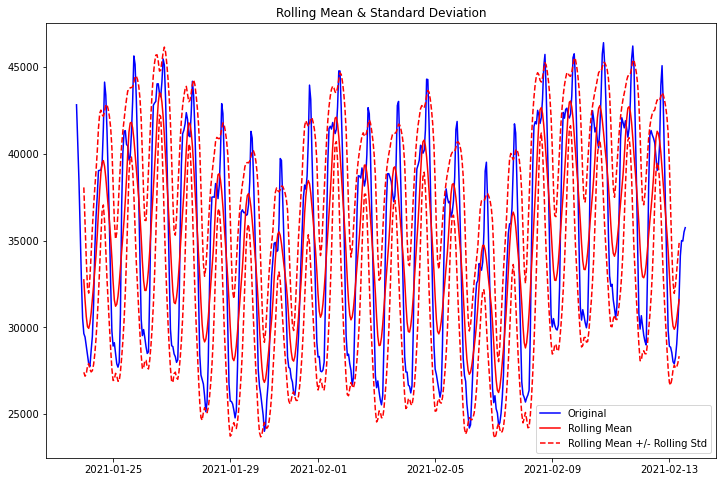

In [59]:
#Assesing stationarity on a small part of the dataset for visual clarity 
rolling(df_hourly1.demand.iloc[-500:])

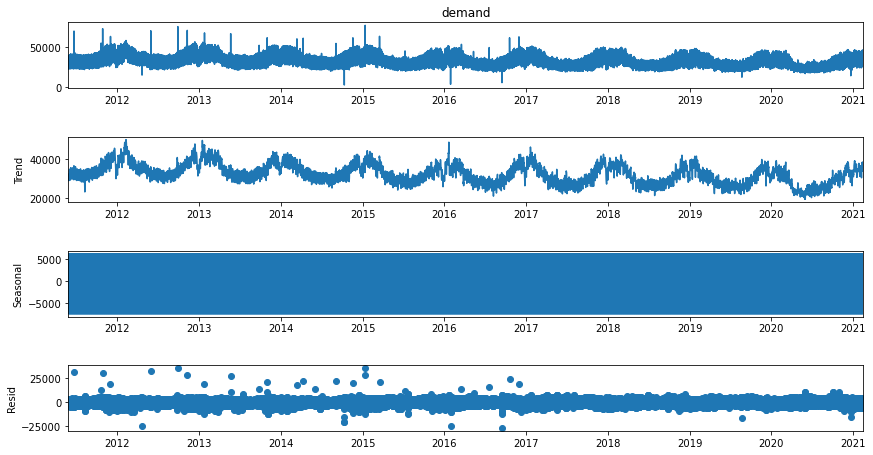

In [31]:
decomposition = sm.tsa.seasonal_decompose(df_hourly1.demand, model='additative',extrapolate_trend='freq')
fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.show()

In [32]:
#Test to see order of differencing needed on hourly demand series
pmd.arima.ndiffs(df_hourly1.demand)

1

In [33]:
#Estimate seasonal diffeerencing required using m=24 as 24 hours in the day
pmd.arima.nsdiffs(df_hourly1.demand,m=24)

0

In [34]:
#Checking stationarity 
# DO UN DIFFERENCED ADF TEST PLUS COMMENTS FOR Richard and Others 
# from statsmodels.tsa.stattools import adfuller
# dftest = adfuller(df_hourly1.demand.diff()[1:],regression='ct', autolag='AIC')
# print('Test statistic = {:.3f}'.format(dftest[0]))
# print('P-value = {:.3f}'.format(dftest[1]))
# print('Critical values :')
# for k, v in dftest[4].items():
#     print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [35]:
#UNDIFFERENCED ADF TEST ALSO IMPLIES STATIONARITY WHICH IM UNSURE ABOUT AS PMD ARIMA TEST IMPLIES DIFFERENCING IS NEEDED
# dftest = adfuller(df_hourly1.demand,regression='ct', autolag='AIC')
# print('Test statistic = {:.3f}'.format(dftest[0]))
# print('P-value = {:.3f}'.format(dftest[1]))
# print('Critical values :')
# for k, v in dftest[4].items():
#     print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [60]:
def autocorr_plots(y, lags=48, alpha=0.05):
    """
    Plot autocorrelations and partial autocorrelations
    Arguments:
    y: Time series
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    """

    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))

    fig, ax = plt.subplots(ncols=2, figsize=(12, 8), sharey=True)

    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0])
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    return fig, ax

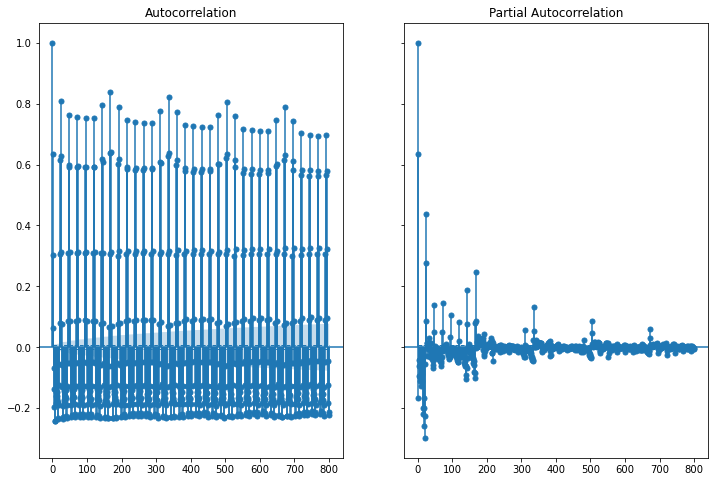

In [62]:
autocorr_plots(df_hourly1.demand.diff().dropna(),lags=800)
plt.show()

In [37]:
pmd.arima.nsdiffs(df_hourly1.demand,m=168)

0

In [38]:
# Plotting acf and pacf of demand time series 
# PLot Confidance Interrvals, SEE LESSONS 
# fig, ax = plt.subplots(nrows=2,figsize=(10,10))
#autocorr_plots(df_hourly1.demand.diff().diff(24).dropna(),lags=800)[1]
#autocorr_plots(df_hourly1.demand.diff().diff(168).dropna(),lags=800)[1]
# plt.show()

In [112]:
#Fitting SARIMA model:
#Without exogenous variables first:
train_data = df_hourly1.demand[:20000]
#model = pmd.arima.ARIMA(order=(1, 0, 3),  #p,d,q
                        #seasonal_order=(1, 0, 1, 168), #P,D,Q,S
                        #maxiter=10000,
                        #with_intercept=True)
#model.fit(data_train)
#model.summary()

In [43]:
import math 
from tqdm import tqdm

In [41]:
math.floor(len(train_data)/12)

1666

In [ ]:
#CV Best model search 
#Set window size to 8 months 
window_length = math.floor(len(train_data)/6)
cv = pmd.model_selection.SlidingWindowForecastCV(h=24,step=5000,window_size= window_length)
model_scores = []
d= 0
D= 0
for p in range(5):
    for q in range(5):
        order = (p, 1, q)
        for P in range(2):
            for Q in range(2):
            
                S_order = (P,D,Q,168) 
                with_intercept = True
                model_cv = pmd.arima.ARIMA(order,
                           seasonal_order=S_order,maxiter=1000, 
                        with_intercept=with_intercept)
                try:
                    cv_scores =  pmd.model_selection.cross_val_score(model_cv, train_data, scoring='mean_squared_error', cv=cv,verbose=1)
                    score = (order,S_order, np.mean(cv_scores))
                except:
                    score = (order,S_order, np.nan)
                model_scores.append(score)

In [46]:
len(model_scores)

24

In [92]:
# Creating SCORES DF 
arima_cv_models = pd.DataFrame(model_scores,columns=['Order','Seasonal_Order','MSE'])
arima_cv_models['RMSE'] = arima_cv_models.MSE.apply(lambda x: float(x**0.5))
arima_cv_models['Model'] = arima_cv_models.apply(lambda x: f'SARIMA({x[0]},{x[1]})',axis=1)
arima_cv_models.drop(columns=['Order','Seasonal_Order'],inplace=True)
arima_cv_models = arima_cv_models[['Model','RMSE']]

NameError: name 'model_scores' is not defined

In [ ]:
train_data[1:]

In [ ]:
train_data.shift()[1:]

In [122]:
#Baseline: Naive predictor model n = n-1 value 
print('MSE:',mean_squared_error(train_data[1:],train_data.shift()[1:]))
baseline_cv_scores = []
data_length = len(train_data)
for i in range(1,6):
    if i == 1:
        start = 1
    else:
        start = math.floor((i-1)*data_length/5)
    end = math.floor((i*data_length)/5)
    score =mean_squared_error(train_data.shift()[start+1:end+1],train_data[start+1:end+1])
    baseline_cv_scores.append(score)
sum(baseline_cv_scores)/len(baseline_cv_scores)

MSE: 4686358.366094209


4686532.026328599

In [124]:
arima_cv_models.loc[len(arima_cv_models.index)] = ['Baseline',float(sum(baseline_cv_scores)/len(baseline_cv_scores))**0.5]

In [91]:
arima_cv_models.groupby('Model').mean().sort_values(by='RMSE',ascending=False)

NameError: name 'arima_cv_models' is not defined

<AxesSubplot:ylabel='Model'>

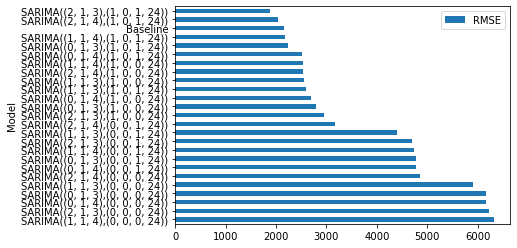

In [128]:
arima_cv_models.groupby('Model').mean().sort_values(by='RMSE',ascending=False).plot(kind='barh')

In [54]:
#Fit best model
data = train_data
#exo_inputs = df_hourly1.iloc[:-10000]
model = pmd.arima.ARIMA(order=(2, 1, 3),  #p,d,q
                        seasonal_order=(1, 0, 1, 24), #P,D,Q,Sq
                        maxiter=10000,
                        with_intercept=True)#enforce_stationarity=False)
model.fit(data)
model.summary()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                20000
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 24)   Log Likelihood             -171930.363
Date:                              Wed, 24 Feb 2021   AIC                         343878.726
Time:                                      23:00:54   BIC                         343949.857
Sample:                                           0   HQIC                        343901.998
                                            - 20000                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.4575      0.012    -37.668      0.000      -0.481      -0.434
ar.L1          1.8239      0.007    246.044      0.000       1.809       1.838
ar.L2         -0.8497      0.007   -119.002      0.000      -0.864      -0.836
ma.L1         -1.8040      0.008   -231.480      0.000      -1.819      -1.789
ma.L2          0.6993      0.011     61.168      0.000       0.677       0.722
ma.L3          0.1234      0.005     25.000      0.000       0.114       0.133
ar.S.L24       0.9939      0.000   2295.459      0.000       0.993       0.995
ma.S.L24      -0.8489      0.004   -200.120      0.000      -0.857      -0.841
sigma2      2.727e+06   1.19e-08   2.28e+14      0.000    2.73e+06    2.73e+06
===================================================================================
Ljung-Box (L1) (Q):                 160.95   Jarque-Bera (JB):          76432307.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                       305.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.37e+28. Standard errors may be unstable.
"""

In [80]:
len(data)

20000

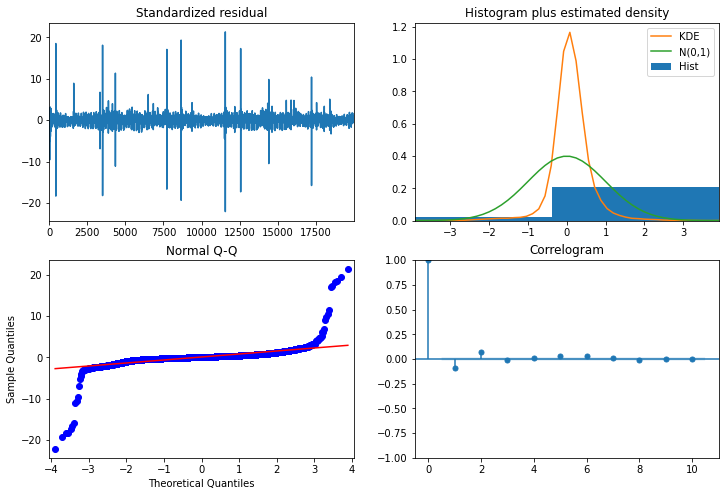

In [56]:
#LOOK INTO Q-Q PLOTS- MEANING 
model.plot_diagnostics(figsize=(12,8))
plt.show()

In [81]:
#Visulising and testing the model forecasts using test data: 
preds,ci = model.predict_in_sample(start=1500, end=len(data)+100, return_conf_int=True, alpha=0.05, dynamic=False)

preds_dyn = model.predict_in_sample(start=len(data)-100,
                            end=len(data)+150, dynamic=True)

index = pd.date_range(start=data.index[1500], periods=len(data)-1500+101, freq=data.index.freqstr)
index_dyn = pd.date_range(start=data.index[len(data)-100], periods=200+50+1, freq=data.index.freqstr)

#Contuctind Series of predictions with their corresponding indecies
preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)
ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)

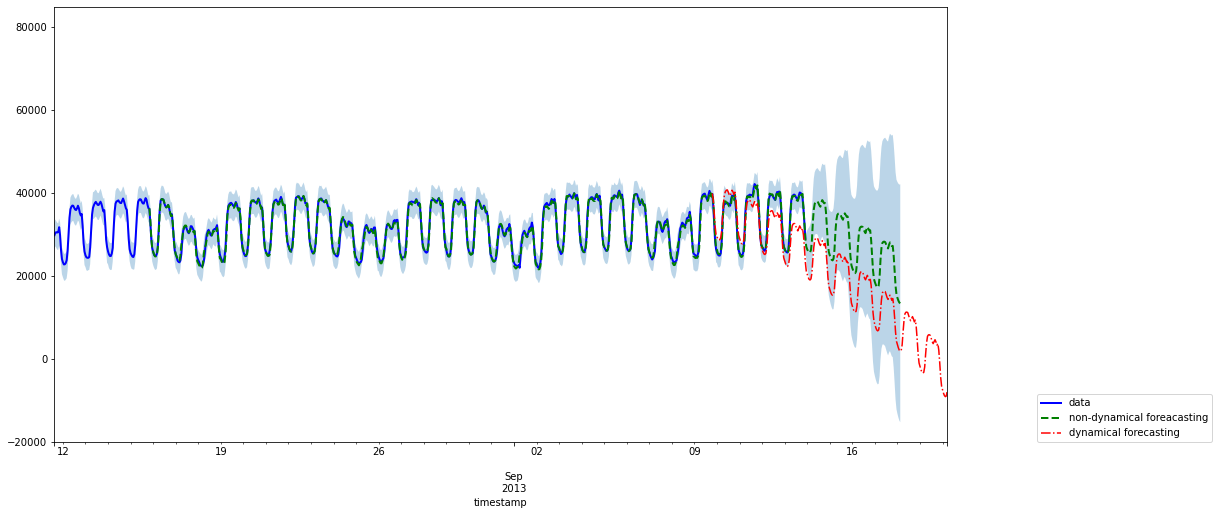

In [85]:
fig, ax = plt.subplots(figsize=(16, 8))
data[19200:].plot(c='b', label='data', lw=2, ax=ax)
preds[-800:].plot(c='g', ls='--', lw=2, label='non-dynamical foreacasting', ax=ax)
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)
i = 12
ax.fill_between(ci.index[i:], ci.iloc[i:,0], ci.iloc[i:, 1], alpha=0.3)
plt.legend(loc=[1.1, 0])
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error
#Calculating RMSE for model without exogenous inputs
print('RMSE:',(mean_squared_error(data[1500:],preds[:-101])**0.5))

RMSE: 1180.2997012394928


In [46]:
df_hourly1.dropna(inplace=True)

In [49]:
# CHECK CONDITIOING NUMBER OF EXO MATRIX
#RAATIO OF LARGEST AND SMALLEST E VALUES COVAR MATRIX
#FORM 
exo_inputs = df_hourly1.iloc[:20000,1:]
np.linalg.cond(exo_inputs.T.dot(exo_inputs))  #IF LARGE = PROBLEM 

1.2217837877763076e+27

In [93]:
exo_inputs.shape

(20000, 53)

In [53]:
#Model with exogenous inputs: 
#data = df_hourly1.demand[:-10000]
model_exoinputs = pmd.arima.ARIMA(order=(2, 1, 3),  #p,d,q
                        seasonal_order=(1, 0, 1, 24), #P,D,Q,Sq
                        maxiter=10000,
                        with_intercept=True,enforce_stationarity=False)
model_exoinputs.fit(train_data,X=exo_inputs)
model_exoinputs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                20000
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 24)   Log Likelihood             -168505.606
Date:                              Wed, 24 Feb 2021   AIC                         337135.212
Time:                                      22:20:11   BIC                         337625.139
Sample:                                  06-03-2011   HQIC                        337295.512
                                       - 09-13-2013                                         
Covariance Type:                                opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -0.0005      0.031     -0.015      0.988      -0.061       0.060
Month_10.0         -2646.3264   2668.387     -0.992      0.321   -7876.268    2583.615
Month_11.0         -3456.7437   2200.658     -1.571      0.116   -7769.954     856.466
Month_12.0         -2959.4278   2101.701     -1.408      0.159   -7078.687    1159.831
Month_2.0            648.5355   1188.851      0.546      0.585   -1681.570    2978.641
Month_3.0            932.4126   1664.534      0.560      0.575   -2330.015    4194.840
Month_4.0           2278.4647   1259.869      1.808      0.071    -190.834    4747.763
Month_5.0            984.1982   1362.725      0.722      0.470   -1686.695    3655.091
Month_6.0          -1047.5755   1333.915     -0.785      0.432   -3662.000    1566.849
Month_7.0          -2590.7599   1258.731     -2.058      0.040   -5057.828    -123.692
Month_8.0          -2537.5459   2276.420     -1.115      0.265   -6999.246    1924.155
Month_9.0          -2488.8506   2709.649     -0.919      0.358   -7799.665    2821.964
Month_nan          -2001.0147   1117.995     -1.790      0.073   -4192.244     190.215
Year_2012.0        -1188.4966    674.707     -1.761      0.078   -2510.899     133.906
Year_2013.0        -2350.3678   2339.038     -1.005      0.315   -6934.798    2234.063
Year_2014.0        -6.903e-10        nan        nan        nan         nan         nan
Year_2015.0         1.865e-09      0.000   1.57e-05      1.000      -0.000       0.000
Year_2016.0         -3.27e-09        nan        nan        nan         nan         nan
Year_2017.0         1.717e-11        nan        nan        nan         nan         nan
Year_2018.0        -2.772e-12   3.27e-10     -0.008      0.993   -6.43e-10    6.38e-10
Year_2019.0         2.169e-14        nan        nan        nan         nan         nan
Year_2020.0         2.537e-11   1.98e-10      0.128      0.898   -3.62e-10    4.13e-10
Year_2021.0         1.167e-11        nan        nan        nan         nan         nan
Year_nan           -2001.0147   1124.154     -1.780      0.075   -4204.315     202.286
Week_day_Monday       34.2976    320.347      0.107      0.915    -593.571     662.166
Week_day_Saturday    -74.8733    221.725     -0.338      0.736    -509.446     359.699
Week_day_Sunday     -106.5856    289.476     -0.368      0.713    -673.948     460.777
Week_day_Thursday     31.4435    231.556      0.136      0.892    -422.398     485.285
Week_day_Tuesday      62.6045    320.426      0.195      0.845    -565.419     690.628
Week_day_Wednesday    74.0976    289.499      0.256      0.798    -493.310     641.505
hour_of_day_1       -165.8977    593.191     -0.280      0.780   -1328.531     996.735
hour_of_day_10      6134.3181    847.532      7.238      0.000    4473.187    7795.449
hour_of_day_11      6339.6526    833.716      7.604      0.000    4705

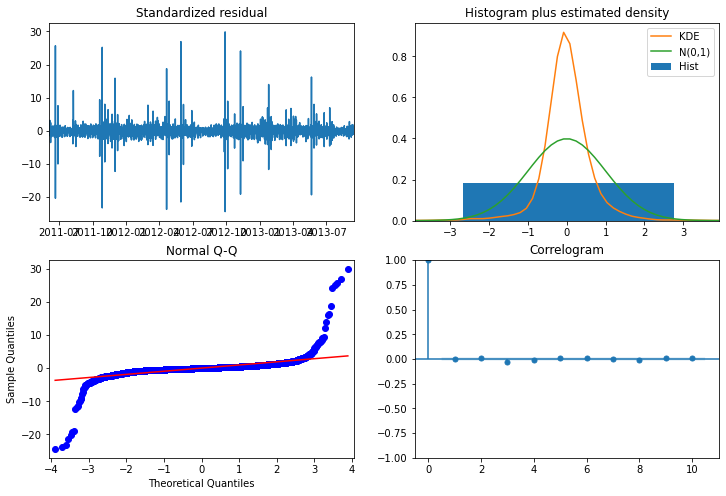

In [103]:
#LOOK INTO Q-Q PLOTS- MEANING 
model_exoinputs.plot_diagnostics(figsize=(12,8))
plt.show()

In [106]:
# Exo INputs for the future predictions beyond the training data 
X_exo = df_hourly1.iloc[20000:,1:]

In [108]:
#Visulising and testing the model forecasts using test data: 
preds,ci = model_exoinputs.predict_in_sample(X=X_exo[:101],start=1500, end=len(data)+100, return_conf_int=True, alpha=0.05, dynamic=False)

preds_dyn = model_exoinputs.predict_in_sample(X=X_exo[:151],start=len(data)-100,
                            end=len(data)+150, dynamic=True)

index = pd.date_range(start=data.index[1500], periods=len(data)-1500+101, freq=data.index.freqstr)
index_dyn = pd.date_range(start=data.index[len(data)-100], periods=200+50+1, freq=data.index.freqstr)

#Contuctind Series of predictions with their corresponding indecies
preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)
ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)

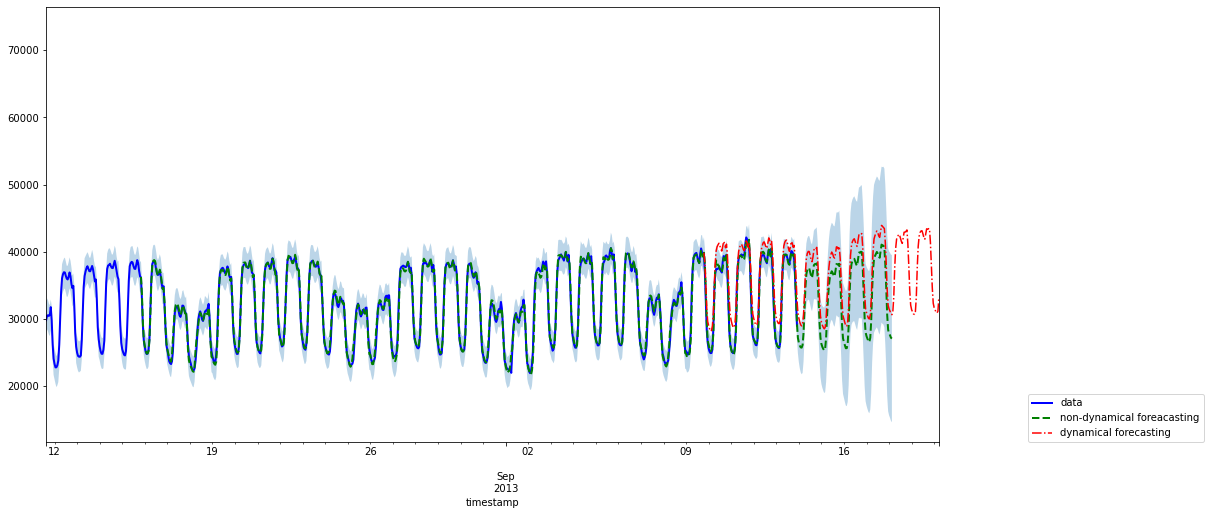

In [110]:
fig, ax = plt.subplots(figsize=(16, 8))
data[19200:].plot(c='b', label='data', lw=2, ax=ax)
preds[-800:].plot(c='g', ls='--', lw=2, label='non-dynamical foreacasting', ax=ax)
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)
i = 12
ax.fill_between(ci.index[i:], ci.iloc[i:,0], ci.iloc[i:, 1], alpha=0.3)
plt.legend(loc=[1.1, 0])
plt.show()

In [111]:
#Calculating RMSE for model without exogenous inputs
print('RMSE:',(mean_squared_error(data[1500:],preds[:-101])**0.5))

RMSE: 1105.08837280311
